# Libraries needed

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Dataset & Preprocessing

In [59]:
# Load the dataset
data = pd.read_csv('placementdata.csv')

# Display the first few rows of the dataset
data.head()


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [60]:
# Count the number of students placed and not placed
placement_counts = data['PlacementStatus'].value_counts()
print("Placement Status Counts:")
print(placement_counts)

Placement Status Counts:
PlacementStatus
NotPlaced    5803
Placed       4197
Name: count, dtype: int64


In [61]:
# Data Preprocessing
# Handle missing values
data.fillna(method='ffill', inplace=True)

# Drop the StudentID column
data.drop(columns=['StudentID'], inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

print("Encoded Data:")
print(data.head())

Encoded Data:
   CGPA  Internships  Projects  Workshops/Certifications  AptitudeTestScore  \
0   7.5            1         1                         1                 65   
1   8.9            0         3                         2                 90   
2   7.3            1         2                         2                 82   
3   7.5            1         1                         2                 85   
4   8.3            1         2                         2                 86   

   SoftSkillsRating  ExtracurricularActivities  PlacementTraining  SSC_Marks  \
0               4.4                          0                  0         61   
1               4.0                          1                  1         78   
2               4.8                          1                  0         79   
3               4.4                          1                  1         81   
4               4.5                          1                  1         74   

   HSC_Marks  PlacementStatus 

C:\Users\asus\AppData\Local\Temp\ipykernel_33828\3968905314.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [62]:
# Define features and target
target = 'PlacementStatus' 
features = [col for col in data.columns if col != 'PlacementStatus']

In [67]:
# Scale numerical features only
numerical_columns = ['CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data[numerical_columns]), columns=numerical_columns)
print("\nData after scaling numerical features:\n", data_scaled.head())



Data after scaling numerical features:
        CGPA  Internships  Projects  Workshops/Certifications  \
0 -0.309343    -0.073889 -1.182822                 -0.014598   
1  1.877818    -1.575689  1.121526                  1.091319   
2 -0.621794    -0.073889 -0.030648                  1.091319   
3 -0.309343    -0.073889 -1.182822                  1.091319   
4  0.940464    -0.073889 -0.030648                  1.091319   

   AptitudeTestScore  SoftSkillsRating  SSC_Marks  HSC_Marks  
0          -1.770910          0.184742  -0.782306   0.504368  
1           1.292970         -0.787072   0.847618   0.840726  
2           0.312528          1.156555   0.943496   0.616487  
3           0.680194          0.184742   1.135251   0.616487  
4           0.802749          0.427695   0.464106   1.513441  


In [29]:
# Apply K-Means Clustering with 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(data_scaled)

# Get cluster labels
labels = kmeans.labels_

# Add cluster labels to the dataset
data['Cluster'] = labels

In [30]:
# Compare cluster labels with the actual PlacementStatus
comparison = pd.crosstab(data['Cluster'], data['PlacementStatus'])
print(comparison)

# Based on the comparison, map the clusters to meaningful names
# Assuming cluster 0 is "Not Placed" and cluster 1 is "Placed" based on the comparison
data['Cluster'] = data['Cluster'].map({0: 'Not Placed', 1: 'Placed'})

PlacementStatus  NotPlaced  Placed
Cluster                           
0                     1403    3466
1                     4400     731


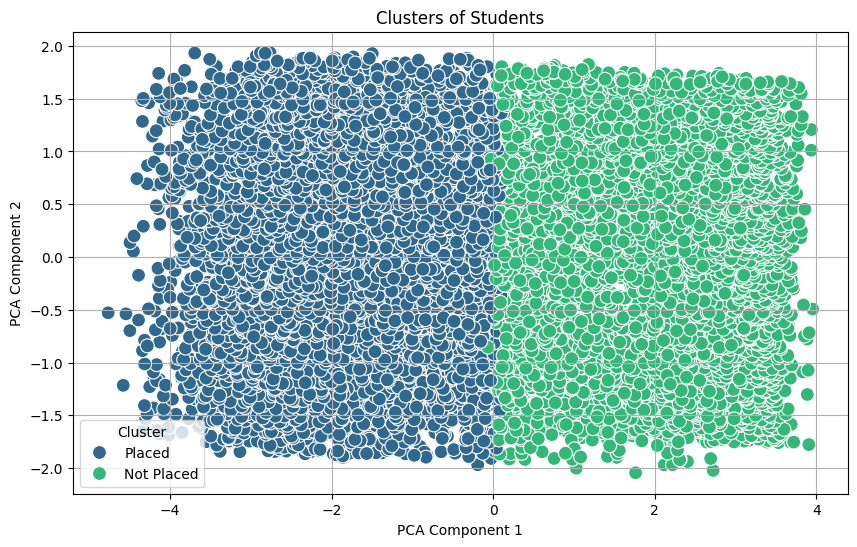

In [31]:
# Visualize the clusters using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Clusters of Students')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [32]:
# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(data_scaled, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.2799278061790786
